In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "Dataset/2020/06/2020.06.19/2020.06.19.csv"
df = pd.read_csv(file_path)
df

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,benign,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,outlier,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,benign,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,benign,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,benign,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765355,118.000000,270,191,786,445.0,4.570315,6,6,6,38592,50822.0,1592611182688869,1592611181766454,2106.915300,outlier,0.922415
765356,6.000000,340,611,786,9200.0,6.196277,2,2,6,786,51148.0,159261118308182,1592611183069313,5892.659700,benign,0.012507
765357,1.111111,348,9126,786,9200.0,2.999871,9,3,6,786,51146.0,1592611183081913,1592611183070674,28420.775000,benign,0.011239
765358,1602.500000,112,112,786,NaN,1.060336,2,2,1,16509,NaN,1592611179165795,159261117275518,237.515150,malicious,6.410615


# Getting some intuition from the data

In [3]:
df.nunique()

avg_ipt           49502
bytes_in          22488
bytes_out         36739
dest_ip             321
dest_port         15902
entropy          285758
num_pkts_out        256
num_pkts_in         256
proto                 5
src_ip              731
src_port          60480
time_end         760440
time_start       760487
total_entropy    299249
label                 3
duration         303697
dtype: int64

not NA: 
 benign       377649
malicious    239495
outlier      123719
Name: label, dtype: int64

NA: 
 malicious    24455
benign          23
outlier         19
Name: label, dtype: int64


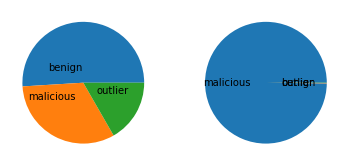

In [4]:
not_na = df[~df["dest_port"].isna()]
count_not_na = not_na["label"].value_counts()
na = df[df["dest_port"].isna()]
count_na = na["label"].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(count_not_na, labels=count_not_na.index, labeldistance=0.25)
ax2.pie(count_na, labels=count_na.index, labeldistance=0.25)
print("not NA: \n", count_not_na)
print()
print("NA: \n", count_na)

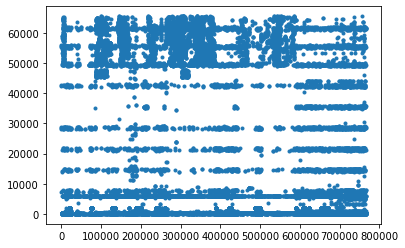

In [5]:
sorted_not_na = not_na[["label", "dest_port"]].sort_values(by="label")
plt.plot(sorted_not_na[sorted_not_na["label"]=="outlier"]["dest_port"], ".")

In [6]:
not_na["label"][not_na["label"]=="malicious"] = 0
not_na["label"][not_na["label"]=="benign"] = 1
not_na["label"][not_na["label"]=="outlier"] = 2
not_na["label"] = not_na["label"].astype(np.int16)

C:\Users\a4009\AppData\Local\Temp\ipykernel_21328\3625225588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_na["label"][not_na["label"]=="malicious"] = 0
C:\Users\a4009\AppData\Local\Temp\ipykernel_21328\3625225588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_na["label"][not_na["label"]=="malicious"] = 0
C:\Users\a4009\AppData\Local\Temp\ipykernel_21328\3625225588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

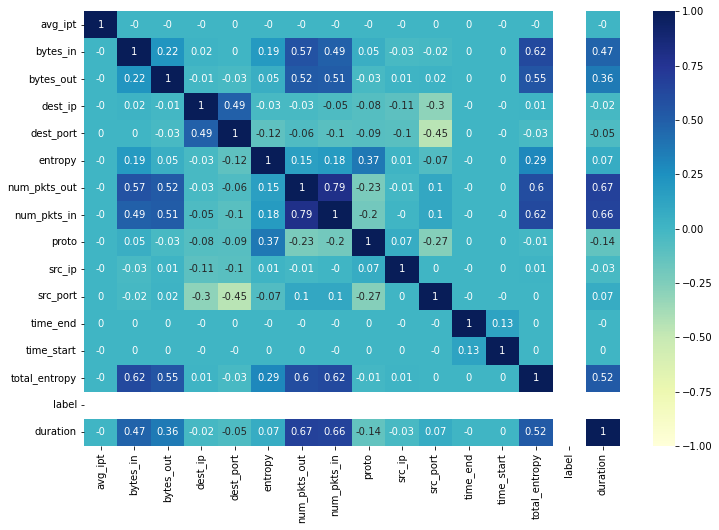

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
38,0.000000,0,0,786,4231.0,0.000000,1,1,6,207812,41228.0,1592533714967956,1592533714967956,0.00000,0,0.000000
39,0.000000,0,0,786,48648.0,0.000000,1,1,6,50340,42166.0,1592533737529803,1592533737529803,0.00000,0,0.000000
102,0.000000,0,0,786,22884.0,0.000000,1,1,6,38365,55874.0,1592533701107675,1592533701107675,0.00000,0,0.000000
153,0.000000,0,0,786,5457.0,0.000000,1,1,6,206728,42810.0,1592533764353983,1592533764353983,0.00000,0,0.000000
175,0.000000,0,0,786,1235.0,0.000000,1,1,6,206728,43538.0,1592533783515817,1592533783515817,0.00000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765334,0.000000,0,0,43289,22882.0,0.000000,1,0,6,786,143.0,1592611170584134,1592611170584134,0.00000,0,0.000000
765336,333.166667,1359,745,786,22.0,6.925014,12,14,6,45090,36157.0,1592611172149953,1592611167912262,14570.22950,0,4.237691
765344,168.500000,19,43,786,3389.0,3.678133,4,3,6,38026,50806.0,1592611178019401,1592611177463787,228.04424,0,0.555614
765345,0.000000,0,0,786,2323.0,0.000000,3,3,6,213371,49385.0,1592611178202885,1592611177960243,0.00000,0,0.242642


In [7]:
malicious_notNa = not_na[not_na["label"]==0] # malicious
plt.figure(figsize=(12,8))
sns.heatmap(malicious_notNa.corr().round(2), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0)
plt.show()
malicious_notNa

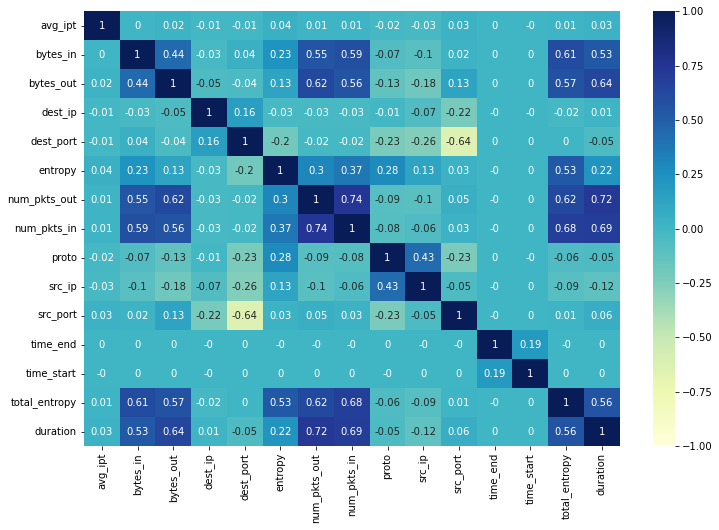

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(2), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0)
plt.show()

In [9]:
df[df.label == "malicious"].nunique()

avg_ipt           10670
bytes_in            763
bytes_out          1098
dest_ip             227
dest_port         10356
entropy           26409
num_pkts_out        213
num_pkts_in         222
proto                 4
src_ip              523
src_port          54363
time_end         263399
time_start       263331
total_entropy     27421
label                 1
duration         169674
dtype: int64

In [10]:
df.nunique()

avg_ipt           49502
bytes_in          22488
bytes_out         36739
dest_ip             321
dest_port         15902
entropy          285758
num_pkts_out        256
num_pkts_in         256
proto                 5
src_ip              731
src_port          60480
time_end         760440
time_start       760487
total_entropy    299249
label                 3
duration         303697
dtype: int64

In [11]:
print(df[df.label == "malicious"]["proto"].unique())
print(df["proto"].unique())

[ 1  6 17 47]
[ 6  1 17 58 47]


([<matplotlib.patches.Wedge at 0x20fa0016eb0>,
 [Text(0.005138763950079621, 0.24994718063035912, 'benign'),
  Text(-0.12605252796260524, -0.21589525282932143, 'malicious'),
  Text(0.21844065007875976, -0.12158816715934502, 'outlier')])

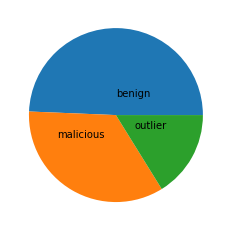

In [14]:
df_ben = df[df["proto"]!=58 & ~df["dest_port"].isna()]
count_df_ben = df_ben["label"].value_counts()
plt.pie(count_df_ben, labels=count_df_ben.index, labeldistance=0.25)


In [17]:
df[df["proto"]==58]["label"].value_counts()

benign    23
Name: label, dtype: int64